## Апанчёнок Александр  
### 8 группа, ТВиМС  
### Отчёт по лабораторной работе 2  
  
**Тема:** Факторный анализ. Метод главных компонент  
**Дата:** 14.11.2025

<div align="center">
  <h2>Содержание</h2>
</div>

1. Загрузка и предобработка данных  
2. Проверка пригодности факторного анализа  
3. Метод главных компонент  
4. Интерпретация факторов  
5. Расчёт интегрального показателя кредитоспособности  
6. Итоговые выводы  


# 1. Загрузка и предобработка данных

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import seaborn as sns

plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True

file = pd.read_csv('../data/Annual 2005-2011.csv')
display(file.head(10))

,empl_num,k1,k2,k3,k4,k5,k6,k7,k8,k9,...,k12,k13,k14,k15,k16,k17,k18,k19,k20,year
0,6095.0,0.942380,0.060563,0.678302,-0.161531,0.202055,0.165019,0.399033,0.799019,5.426569,...,1.082798,0.655937,4.454819,3.975687,0.892446,1007.536232,0.076738,0.055049,0.034904,5.0
1,255.0,1.980494,0.274382,0.916775,0.624425,0.089377,0.220648,0.000000,0.933519,14.041958,...,1.123828,0.705951,10.618881,12.295547,1.157895,357.294118,0.116068,0.059740,0.025647,5.0
2,114.0,0.374160,0.001494,0.085138,-1.504990,0.235739,0.508929,0.888889,0.779049,5.017007,...,1.185374,0.123415,0.794785,6.258929,7.875000,36.894737,-0.584879,0.010563,0.000000,5.0
3,365.0,7.859079,0.831978,2.449864,0.875862,0.059439,0.030030,0.011111,0.942010,16.244444,...,1.309449,2.804607,48.363889,26.142643,0.540541,33.676983,0.171731,0.496295,0.312415,5.0
4,168.0,1.779376,0.005596,0.883293,0.527853,0.135491,0.886686,0.489796,0.887341,10.558673,...,0.994832,0.473041,5.628827,3.125354,0.555241,19.103896,0.064809,0.025726,0.011839,5.0
5,6969.0,4.200293,1.310167,2.355742,0.767058,0.067142,0.043515,0.001988,0.934306,14.222452,...,1.081892,0.958338,14.588270,13.651105,0.935759,84.654633,0.164268,0.140701,0.098621,5.0
6,1754.0,0.835976,0.008003,0.182230,-0.200464,0.488237,0.427889,0.090158,0.516995,2.298864,...,1.058383,0.989701,4.400794,9.688993,2.201647,6.725695,0.041624,0.035402,0.043877,5.0
7,146.0,4.096916,1.193833,1.823789,0.683871,0.036512,0.321678,0.271889,0.964689,37.013825,...,1.015167,0.519457,19.930876,30.244755,1.517483,22.763158,0.084162,0.037833,0.017057,5.0
8,1674.0,2.194307,0.112153,0.740924,0.554451,0.193730,0.023384,0.078174,0.810724,5.873536,...,1.001019,1.829401,13.253646,14.566474,1.099054,19.493671,0.060137,0.117208,0.091945,5.0
9,2455.0,1.215800,0.063003,0.413992,0.089936,0.341383,0.057987,0.041190,0.660346,4.521441,...,1.017691,1.188855,8.140185,10.115851,1.242705,27.631543,0.102509,0.088303,0.062603,5.0


Далее выбираются только числовые признаки и удаляются наблюдения с пропусками.

In [11]:
numeric_columns = file.select_dtypes(include=[np.number]).columns
data_numeric = file[numeric_columns]
data_clean = data_numeric.dropna()
data_clean.shape

(2695, 22)

# 2. Проверка пригодности факторного анализа

### Тест Бартлетта и критерий KMO

In [12]:
chi_square_value, p_value = calculate_bartlett_sphericity(data_clean)
print("Тест сферичности Бартлетта")
print(f"Приближённое значение хи-квадрат: {chi_square_value:.3f}")
print(f"Степени свободы: {data_clean.shape[1] * (data_clean.shape[1] - 1) // 2}")
print(f"P-value: {p_value:.4f}")

kmo_all, kmo_model = calculate_kmo(data_clean)
print("\nКритерий Кайзера–Мейера–Олкина")
print(f"KMO: {kmo_model:.3f}")

if kmo_model >= 0.9:
    kmo_level = "отличное"
elif kmo_model >= 0.8:
    kmo_level = "хорошее"
elif kmo_model >= 0.7:
    kmo_level = "удовлетворительное"
elif kmo_model >= 0.6:
    kmo_level = "приграничное"
else:
    kmo_level = "недостаточное"

print(f"Качество выборки для факторного анализа: {kmo_level}")

Тест сферичности Бартлетта
Приближённое значение хи-квадрат: 40874.337
Степени свободы: 231
P-value: 0.0000

Критерий Кайзера–Мейера–Олкина
KMO: 0.748
Качество выборки для факторного анализа: удовлетворительное


Полученные значения показывают, отвергается ли гипотеза об единичной корреляционной матрице и достаточно ли тесная связь между переменными для применения факторного анализа.

# 3. Метод главных компонент

### Корреляционная матрица

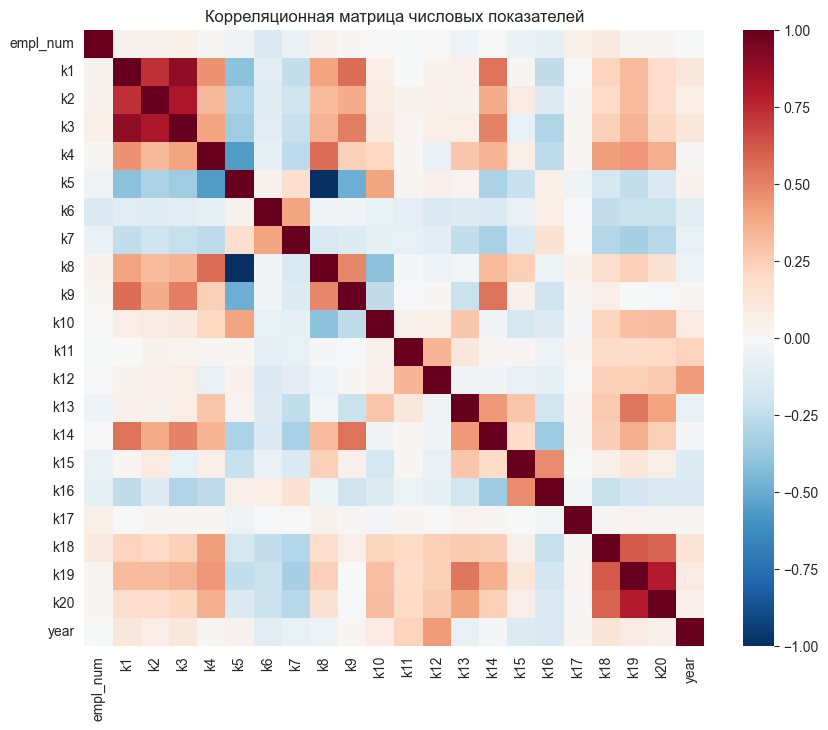

In [13]:
corr = data_clean.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Корреляционная матрица числовых показателей')
plt.show()

### Собственные значения и диаграмма каменистой осыпи

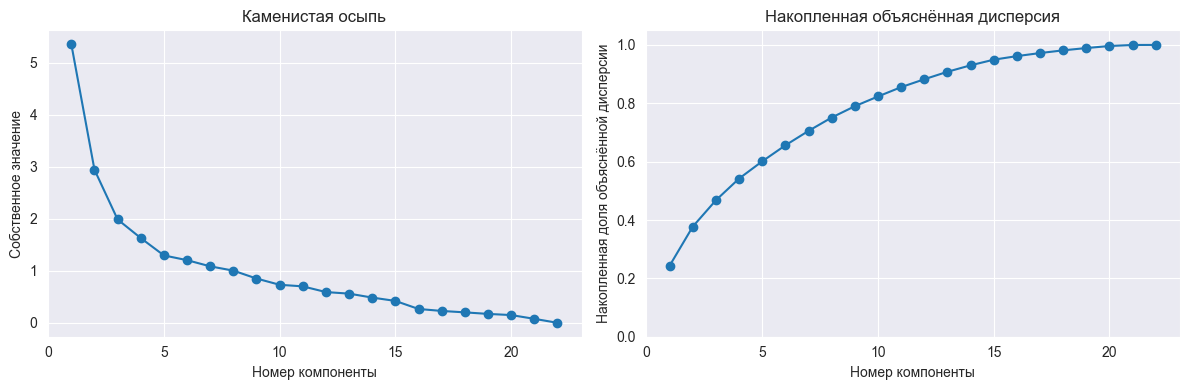

,Компонента,Собственное значение,Доля дисперсии,Накопленная доля
0,1,5.359109,0.243505,0.243505
1,2,2.946609,0.133887,0.377393
2,3,1.990288,0.090434,0.467827
3,4,1.632581,0.074181,0.542007
4,5,1.298939,0.059021,0.601028
5,6,1.207523,0.054867,0.655895
6,7,1.088927,0.049478,0.705373
7,8,1.006261,0.045722,0.751096
8,9,0.854580,0.038830,0.789926
9,10,0.734280,0.033364,0.823290


In [14]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

pca_full = PCA()
pca_full.fit(data_scaled)

eigenvalues = pca_full.explained_variance_
explained_ratio = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained_ratio)

components = np.arange(1, len(eigenvalues) + 1)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(components, eigenvalues, marker='o')
axes[0].set_xlabel('Номер компоненты')
axes[0].set_ylabel('Собственное значение')
axes[0].set_title('Каменистая осыпь')

axes[1].plot(components, cum_explained, marker='o')
axes[1].set_xlabel('Номер компоненты')
axes[1].set_ylabel('Накопленная доля объяснённой дисперсии')
axes[1].set_ylim(0, 1.05)
axes[1].set_title('Накопленная объяснённая дисперсия')

plt.tight_layout()
plt.show()

pd.DataFrame({
    'Компонента': components,
    'Собственное значение': eigenvalues,
    'Доля дисперсии': explained_ratio,
    'Накопленная доля': cum_explained
})

### Выбор числа факторов и факторные нагрузки

In [15]:
eigenvalues_kaiser = eigenvalues[eigenvalues > 1]
optimal_factors = len(eigenvalues_kaiser)
if optimal_factors == 0:
    optimal_factors = 1
print(f'Число факторов по критерию Кайзера: {optimal_factors}')

fa = FactorAnalyzer(n_factors=optimal_factors, rotation='varimax', method='principal')
fa.fit(data_scaled)

loadings = fa.loadings_
loadings_df = pd.DataFrame(
    loadings,
    index=data_clean.columns,
    columns=[f'Фактор_{i+1}' for i in range(optimal_factors)]
)

significant_loadings = loadings_df.where(loadings_df.abs() > 0.4)
display(significant_loadings.round(3))

variance_after_rotation = fa.get_factor_variance()
variance_rotation_df = pd.DataFrame({
    'Фактор': [f'Фактор_{i+1}' for i in range(optimal_factors)],
    'Собственное значение': variance_after_rotation[0],
    'Доля дисперсии': variance_after_rotation[1],
    'Накопленная доля': variance_after_rotation[2]
})
variance_rotation_df

Число факторов по критерию Кайзера: 8


C:\Users\GIGABYTE\PycharmProjects\daefi\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Фактор_1,Фактор_2,Фактор_3,Фактор_4,Фактор_5,Фактор_6,Фактор_7,Фактор_8
empl_num,NaN,NaN,NaN,NaN,NaN,0.584,-0.401,NaN
k1,0.895,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k2,0.878,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k3,0.916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k4,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN
k5,NaN,NaN,NaN,NaN,-0.908,NaN,NaN,NaN
k6,NaN,NaN,NaN,NaN,NaN,-0.774,NaN,NaN
k7,NaN,NaN,NaN,NaN,NaN,-0.614,NaN,NaN
k8,NaN,NaN,NaN,NaN,0.911,NaN,NaN,NaN
k9,0.547,NaN,NaN,NaN,0.527,NaN,NaN,NaN


,Фактор,Собственное значение,Доля дисперсии,Накопленная доля
0,Фактор_1,3.250650,0.147757,0.147757
1,Фактор_2,3.170758,0.144125,0.291882
2,Фактор_3,1.591747,0.072352,0.364234
3,Фактор_4,1.785007,0.081137,0.445371
4,Фактор_5,2.733227,0.124238,0.569609
5,Фактор_6,1.470422,0.066837,0.636446
6,Фактор_7,1.500707,0.068214,0.704660
7,Фактор_8,1.021585,0.046436,0.751096


# 4. Интерпретация факторов

In [16]:
for i in range(optimal_factors):
    col = f'Фактор_{i+1}'
    col_values = loadings_df[col].abs().sort_values(ascending=False)
    top_vars = col_values.head(5).index.tolist()
    print(f'{col}: наибольший вклад дают показатели: {", ".join(top_vars)}')

Фактор_1: наибольший вклад дают показатели: k3, k1, k2, k9, k14
Фактор_2: наибольший вклад дают показатели: k19, k20, k18, k4, k13
Фактор_3: наибольший вклад дают показатели: k16, k15, empl_num, k4, k9
Фактор_4: наибольший вклад дают показатели: k12, year, k11, k18, k20
Фактор_5: наибольший вклад дают показатели: k8, k5, k10, k9, k4
Фактор_6: наибольший вклад дают показатели: k6, k7, empl_num, k18, k14
Фактор_7: наибольший вклад дают показатели: k14, k13, empl_num, k7, k16
Фактор_8: наибольший вклад дают показатели: k17, empl_num, k7, k13, k11


Список переменных с наибольшими нагрузками по каждому фактору показывает экономический смысл полученных скрытых компонент.

# 5. Расчёт интегрального показателя кредитоспособности

In [17]:
factor_scores = fa.transform(data_scaled)
factor_scores_df = pd.DataFrame(
    factor_scores,
    columns=[f'Фактор_{i+1}' for i in range(optimal_factors)],
    index=data_clean.index
)

weights = variance_after_rotation[1]
weights = weights / weights.sum()
credit_score = factor_scores_df.values.dot(weights)

credit_score_series = pd.Series(credit_score, index=data_clean.index, name='credit_score')
credit_score_series.head(10)

C:\Users\GIGABYTE\PycharmProjects\daefi\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0   -0.197539
1    0.129723
2   -0.647605
3    1.109256
4   -0.306740
5    0.482257
6   -0.364637
7    0.499418
8    0.076850
9   -0.147421
Name: credit_score, dtype: float64

Добавим показатель кредитоспособности к исходным данным и посмотрим его распределение.

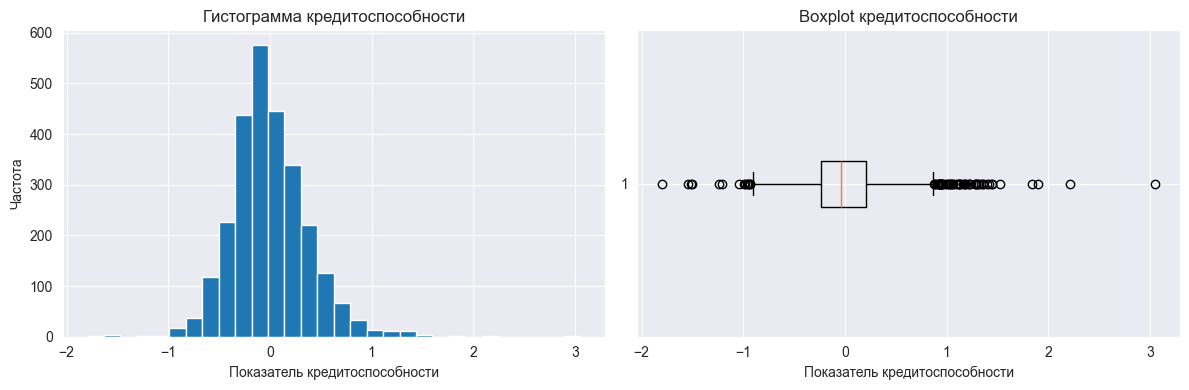

In [18]:
file_with_score = file.copy()
file_with_score.loc[credit_score_series.index, 'credit_score'] = credit_score_series

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(credit_score_series, bins=30)
plt.xlabel('Показатель кредитоспособности')
plt.ylabel('Частота')
plt.title('Гистограмма кредитоспособности')

plt.subplot(1, 2, 2)
plt.boxplot(credit_score_series, vert=False)
plt.xlabel('Показатель кредитоспособности')
plt.title('Boxplot кредитоспособности')

plt.tight_layout()
plt.show()

# 6. Итоговые выводы

In [19]:
total_variance = variance_after_rotation[2][-1] if optimal_factors > 0 else 0

results_summary = {
    'Размер исходной выборки': file.shape,
    'Число числовых переменных': data_clean.shape[1],
    'Число наблюдений после очистки': data_clean.shape[0],
    'KMO': float(kmo_model),
    'Bartlett p-value': float(p_value),
    'Число факторов': int(optimal_factors),
    'Объяснённая дисперсия, %': float(total_variance * 100)
}

for key, value in results_summary.items():
    print(f'{key}: {value}')

print(f'Главные компоненты объясняют {total_variance * 100:.1f}% вариации исходных показателей')

Размер исходной выборки: (2695, 22)
Число числовых переменных: 22
Число наблюдений после очистки: 2695
KMO: 0.7484416972164813
Bartlett p-value: 0.0
Число факторов: 8
Объяснённая дисперсия, %: 75.10955624894855
Главные компоненты объясняют 75.1% вариации исходных показателей


По результатам факторного анализа можно сделать следующие выводы:

- Корреляционная структура данных позволяет применять метод главных компонент.  
- Выделено ограниченное число факторов, которые описывают основную часть дисперсии исходных показателей.  
- На основании факторных нагрузок выделены наиболее информативные переменные по каждому фактору.  
- Интегральный показатель кредитоспособности учитывает вклад всех выбранных факторов и может использоваться для сравнения предприятий между собой.